### yolo 재학습
- 필요 패키지 확인
    - pytorch 기반으로 구성된 알고리즘
    - gpu 기반으로 만들어진 알고리즘이기 때문에, gpu 사용가능해야 함
    - python 기반 알고리즘: v3.8이 가장 최적화 되어 있음

In [1]:
import torch
torch.__version__

'2.0.1'

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Thu Sep  7 15:33:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   74C    P0    70W /  70W |   7649MiB / 15360MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### pytorch 사이트 주소
- https://pytorch.org/get-started/locally/

1. gpu 정보에 CUDA 버전 확인  
`nvidia-smi`


2. yolo 전용 가상환경 생성. 가상환경명: yolov5Test  
`conda create --name yolov5Test python=3.8`


3. 가상 환경 안으로 들어가기  
`conda activate yolov5Test`


4. 파이토치 설치: start locally > stable, linux, conda, python, cuda11.7  
`conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia`

  
5. 가상 환경(yolov5Test)을 만들면 주피터 노트북을 연결  
`python -m ipykernel install --user --name <가상환경명> --display-name "커널출력명(주피터노트북에 어떻게 나타나게 하는지)"`  
`python -m ipykernel install --user --name yolov5Test --display-name "yolov5Test"`


5-1. /home/ubuntu/anaconda3/envs/yolov5Test/bin/python: No module named ipykernel에러 뜨면  
`pip install ipykernel`  
그다음 주피터 노트북 켜주면 됨. 이제 yolov5Test 사용 가능.  
`nohup jupyter-notebook --ip=0.0.0.0 --no-browser --port=8xxx &`  
다른 커널 쓰고 싶으면 액티베이션 Python3으로 해놓고 들어오면 됨  

In [3]:
!python --version

Python 3.8.12


### GPU
- CPU보다 더 작고 전문화된 코어로 구성된 프로세서
- 여러 개의 코어가 함께 작동하므로
    - 여러 코어로 나누어 처리할 수 있는 작업의 경우 성능의 이점을 제공
- 시스템에서 그래픽 연산을 빠르게 처리하여 결과값을 모니터에 출력하는 연산장치

### yolov5를 활용한 이미지 객체 검출 재학습
1. 재학습 이미지 준비 A. 이미지 관련 데이터 생성
2. yolov5 다운로드 (기 학습된 모델활용 재학습) A. 필수패키지 install
3. yolo 설정파일(yaml) 의 내용을 재학습 이미지에 맞게 수정
4. 재학습 : yolo 파일의 train.py 파일을 이용
5. 예측 : yolo 파일의 detect.py 파일을 이용

In [4]:
# yolov5 파일 다운
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
%ls

 033120_HT_covid-cat_feat-1028x579.jpg
'1. KoBERT_HF_감성_이진분류.ipynb'
 7_3-05.png
 Pistols-1/
 accuracy.jpg
 best-cnn-model.h5
 best-embedding-model.h5
 best-lstm-model.h5
 best-model.h5
 best-simplernn-model.h5
 callback_early.jpg
 cardataset/
 cleandata/
 cnn-architecture.png
 data/
 data_out/
 drop.jpg
 gun.jpg
 gun.mp4
 horse-or-human/
 horse-or-human.zip
 image/
 kfood/
 loss2.png
 loss_1.jpg
 model-weights.h5
 model-whole.h5
 model.png
'ratings_test.txt?dl=1'
'ratings_train.txt?dl=1'
 review.h5
 rps/
 rps-test-set/
 rps-test-set.zip
 rps.zip
 rps_test_val/
 t_v.jpg
 validation-horse-or-human.zip
 yolov3.cfg
 yolov3.weights
 yolov5/
 yolov5s.pt
 딥러닝0_인공신경망.ipynb
'딥러닝10_cv를 활용한 객체검출.ipynb'
'딥러닝11_yolov5 재학습.ipynb'
 딥러닝1_.심층신경망.ipynb
 딥러닝2_신경망모델훈련.ipynb
 딥러닝3_합성곱신경망.ipynb
'딥러닝4_0_합성곱 신경망을 사용한 이미지 분류하기.ipynb'
 딥러닝4_1_합성곱신경망이미지분류2.ipynb
 딥러닝4_1_합성곱신경망이미지분류2_다중분류.ipynb
 딥러닝4_1_합성곱신경망이미지분류2_전이학습.ipynb
 딥러닝4_2_합성곱신경망이미지분류3.ipynb
'딥러닝5_순차데이터와 순환신경망.ipynb'
'딥러닝6_딥러닝 자연어 처리.ipynb'
 딥러닝7_순환신경망

In [6]:
%cd yolov5/

/home/lab06/Deep_Learning/yolov5


In [7]:
%pwd

'/home/lab06/Deep_Learning/yolov5'

In [8]:
!pip install -r requirements.txt

  Obtaining dependency information for gitpython>=3.1.30 from https://files.pythonhosted.org/packages/38/fb/1a372b2a6be38501c66f714c07077cf9d9b84bfbf539f2c20639339a7f03/GitPython-3.1.34-py3-none-any.whl.metadata
  Using cached GitPython-3.1.34-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for numpy>=1.22.2 from https://files.pythonhosted.org/packages/98/5d/5738903efe0ecb73e51eb44feafba32bdba2081263d40c5043568ff60faf/numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached torchvision-0.15.2-cp38-cp38-manylinux1_x86_64.whl (33.8 MB)
  Obtaining dependency information for tqdm>=4.64.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-

### 학습 데이터셋 roboflow에서 다운받기

- https://universe.roboflow.com/joseph-nelson/pistols/dataset/1

- 학습데이터와 yolo 모델 파일 데이터는 같은 디렉터리에 저장

In [9]:
%cd ..

/home/lab06/Deep_Learning


In [10]:
%ls

 033120_HT_covid-cat_feat-1028x579.jpg
'1. KoBERT_HF_감성_이진분류.ipynb'
 7_3-05.png
 Pistols-1/
 accuracy.jpg
 best-cnn-model.h5
 best-embedding-model.h5
 best-lstm-model.h5
 best-model.h5
 best-simplernn-model.h5
 callback_early.jpg
 cardataset/
 cleandata/
 cnn-architecture.png
 data/
 data_out/
 drop.jpg
 gun.jpg
 gun.mp4
 horse-or-human/
 horse-or-human.zip
 image/
 kfood/
 loss2.png
 loss_1.jpg
 model-weights.h5
 model-whole.h5
 model.png
'ratings_test.txt?dl=1'
'ratings_train.txt?dl=1'
 review.h5
 rps/
 rps-test-set/
 rps-test-set.zip
 rps.zip
 rps_test_val/
 t_v.jpg
 validation-horse-or-human.zip
 yolov3.cfg
 yolov3.weights
 yolov5/
 yolov5s.pt
 딥러닝0_인공신경망.ipynb
'딥러닝10_cv를 활용한 객체검출.ipynb'
'딥러닝11_yolov5 재학습.ipynb'
 딥러닝1_.심층신경망.ipynb
 딥러닝2_신경망모델훈련.ipynb
 딥러닝3_합성곱신경망.ipynb
'딥러닝4_0_합성곱 신경망을 사용한 이미지 분류하기.ipynb'
 딥러닝4_1_합성곱신경망이미지분류2.ipynb
 딥러닝4_1_합성곱신경망이미지분류2_다중분류.ipynb
 딥러닝4_1_합성곱신경망이미지분류2_전이학습.ipynb
 딥러닝4_2_합성곱신경망이미지분류3.ipynb
'딥러닝5_순차데이터와 순환신경망.ipynb'
'딥러닝6_딥러닝 자연어 처리.ipynb'
 딥러닝7_순환신경망

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tx0XXjmCSXIkMD8FMRMD")
project = rf.workspace("joseph-nelson").project("pistols")
dataset = project.version(1).download("yolov5")

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/7b/a0/97f61b88f478b9a3cbdc9f352dd1ee65915e590cee6b32a5577c58870deb/roboflow-1.1.5-py3-none-any.whl.metadata
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Obtaining dependency information for supervision from https://files.pythonhosted.org/packages/38/31/19d39cde7723206ecc1e054d16c792204a76ab884fefa656ea297b26af9e/supervision-0.14.0-py3-none-any.whl.metadata
  Using cached su

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Extracting Dataset Version Zip to Pistols-1 in yolov5pytorch:: 100%|██████████| 5945/5945 [00:00<00:00, 6535.11it/s]


## 학습 이미지 경로 설정 파일 구성
- data.yaml 파일 생성
- roboflow에서 다운 받은 yolov5 dataset에는 해당 파일이 생성되어 있음
    - 직접 수집한 이미지를 재학습 시키려면 해당 파일은 메모장으로 생성하면 됨
    
    
- yaml 파일의 필수 요소
    - 학습데이터 경로
        - train: train/images
        - val: valid/images
        - test: test/images
    - 클래스 수
        - nc: 2
    - 클래스 이름
        - names: ['name1','name2',...]


- train / val : 학습에 사용될 이미지의 파일명 넣기 (직접 만들어야 함)
- test(학습데이터 경로 중), 클래스 이름 안 들어가 있는 경우 많음

### 재학습 방법
1. dataset/label 포함 준비
2. 학습시킬 이미지의 파일명과 라벨 정보를 모델에게 전달해야하므로   
    - **a.** 사용할 이미지의 저장 경로 및 파일명을 리스트로 생성  
    - **b.** a번에서 생성한 리스트를 이용해서 학습/검증 데이터 분리  
    - **c.** b번에서 분리된 내용을 이용해서 각 이미지 파일명을 txt 파일로 생성
        - 파일저장 경로는 어디든 상관 없지만 보통 dataset이 있는 곳에 같이 저장하는 것이 효율적
        - Pistols-1 디렉터리에 저장
    - **d.** data.yaml 파일 수정
        - c번에서 생성한 txt 파일을 train, val 정보로 전달
        - 프로그램 내에서 load해서 파일 수정

#### a. 사용할 이미지의 저장 경로 및 파일명을 리스트로 생성

In [12]:
from glob import glob
img_list = glob('Pistols-1/export/images/*.jpg')
print(len(img_list))  # 현재 사용하는 이미지 2971개

2971


In [13]:
img_list  # jpg에 해당되는 모든 파일명 리스트로 반환

['Pistols-1/export/images/armas (663)_jpg.rf.d9d86fa3e2119f3d9841684e0b643055.jpg',
 'Pistols-1/export/images/armas (765)_jpg.rf.6c43a016230f55d3a32522d5793361b1.jpg',
 'Pistols-1/export/images/armas (593)_jpg.rf.5198aab96c4568d456e1a379d15af5c3.jpg',
 'Pistols-1/export/images/armas (1789)_jpg.rf.454c60e6ab985415e3a7bcd3920abdb8.jpg',
 'Pistols-1/export/images/armas (485)_jpg.rf.be680bde647cfcb709176c3c44089d90.jpg',
 'Pistols-1/export/images/armas (763)_jpg.rf.6e6d88bc42c8f3df12bfdbce16d29cbb.jpg',
 'Pistols-1/export/images/armas (385)_jpg.rf.f4e0af65afda1b78b09085ca945eb01b.jpg',
 'Pistols-1/export/images/armas (1160)_jpg.rf.aa99e3a71daa49c1647fda10bfa0a8db.jpg',
 'Pistols-1/export/images/armas (2896)_jpg.rf.8507d2339933f643c7f8f1de16236b61.jpg',
 'Pistols-1/export/images/armas (329)_jpg.rf.8fa6b2984df560b356151cd5e8dd424c.jpg',
 'Pistols-1/export/images/armas (2227)_jpg.rf.d62a9155e09dba2ce3c870cc84048ada.jpg',
 'Pistols-1/export/images/armas (2196)_jpg.rf.83b607990bda5b99df67aaca14

In [14]:
!pip install scikit-learn

#### b. a번에서 생성한 리스트를 이용해서 학습/검증 데이터 분리

In [15]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size = 0.2, random_state = 2000)
print(len(train_img_list), len(val_img_list))  # 2376 595

2376 595


In [16]:
val_img_list

['Pistols-1/export/images/armas (1265)_jpg.rf.ea835b144e3b03b8004bae0438d71abb.jpg',
 'Pistols-1/export/images/armas (145)_jpg.rf.63e2b44cf6c855f476f580ea928a5ebd.jpg',
 'Pistols-1/export/images/armas (1352)_jpg.rf.17f3fe0e6abae78f57f76d7fe30a1069.jpg',
 'Pistols-1/export/images/armas (2607)_jpg.rf.be031924efddd1fa89363f297780deed.jpg',
 'Pistols-1/export/images/armas (1245)_jpg.rf.3b495e665cff30b306cb4764f15c1d8b.jpg',
 'Pistols-1/export/images/armas (2927)_jpg.rf.b713efc3464d2f7e08095ce5675225a6.jpg',
 'Pistols-1/export/images/armas (740)_jpg.rf.c0f76fdc3c589a7f80bd3d9940e37d5d.jpg',
 'Pistols-1/export/images/armas (1897)_jpg.rf.94e1041ca6844b742063722d3938323b.jpg',
 'Pistols-1/export/images/armas (2266)_jpg.rf.ca8d3fb6d8e5dd2b5a6e46765fd29e53.jpg',
 'Pistols-1/export/images/armas (305)_jpg.rf.7ddbd7a0fed0fa74a02e061169b57111.jpg',
 'Pistols-1/export/images/armas (2244)_jpg.rf.3feddb1b46286c9c6039ae8964268e22.jpg',
 'Pistols-1/export/images/armas (43)_jpg.rf.982f941b97a9df35b93d9f57

In [17]:
!pwd
# !ls

/home/lab06/Deep_Learning


#### c. b번에서 분리된 내용을 이용해서 각 이미지 파일명을 txt 파일로 생성

In [18]:
with open('Pistols-1/train.txt', 'w') as f :  # 파일 쓰기용으로 열기
    f.write('\n'.join(train_img_list) + '\n')
    
with open('Pistols-1/val.txt', 'w') as f :  # 파일 쓰기용으로 열기
    f.write('\n'.join(val_img_list) + '\n')    

#### d. data.yaml 파일 수정

In [19]:
import yaml

# 외부파일 읽기용으로 열어서 해당 파일 yaml 형식으로 laod
with open('./Pistols-1/data.yaml', 'r') as f :  # 읽기 전용으로 열기
    data = yaml.safe_load(f)
print(data)

{'names': ['pistol'], 'nc': 1, 'train': 'Pistols-1/train/images', 'val': 'Pistols-1/valid/images'}


In [20]:
# 설정 적용
# 해당 파일을 보는(yolo train 파일이 yaml을 찾는 위치) 위치 : yolov5 폴더에서 찾으라고 코딩되어 있음

# 아래와 같이 설정하면 yolo는 yolov5/Pistols-1/train.txt를 찾게 됨
# data['train'] = './Pistols-1/train.txt'  # train key 값 변경
data['train'] = '../Pistols-1/train.txt'
data['val'] = '../Pistols-1/val.txt'
data

{'names': ['pistol'],
 'nc': 1,
 'train': '../Pistols-1/train.txt',
 'val': '../Pistols-1/val.txt'}

In [21]:
with open('./Pistols-1/data.yaml', 'w') as f :  # 쓰기용
    yaml.dump(data, f)

### 재학습
- 현재 디렉터리 확인 후 train.py 파일 사용해서 재학습 진행
- 관련 파라미터 (파이썬 프로그램 파일 실행 옵션)
    - img : 입력 이미지 크기 정의
    - batch : 배치 사이즈 결정
    - epochs : 훈련 에포크의 수 정의(Note : 주로 3000이상)
    - data : yaml 파일의 경로 설정
    - cfg : 모델 설정 지정
    - weights : 가중치 custom 경로 지정(Note : Ultralytics Google Drive folder에서 다운로드 가능)
    - name : 결과명
    - nosave : 최종 checkpoint만 저장
    - cache : 더 빠른 훈련을 위한 캐싱 이미지

- yolov5 > train.py : 이미 만들어져 있는 python 파일이기 때문에 따로 실행시켜야 함
    - python 명령어를 통해 train.py 실행됨
    - notebook에서는 실행 불가능

In [22]:
# py 파일 실행하는 방법
!python ./yolov5/train.py --img 416 --batch 4 --epochs 50 --data ./Pistols-1/data.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name results

# -- 붙으면 실행 옵션 
# 416 : 이미지 크기, 한 번에 4개의 이미지 들어가도록, 50번 반복
# --cfg : 모델의 구성과 관련된 파일 위치 찾기
# l, m, n, s, x : 가장 기본적으로 s를 사용한다.
# name : 학습된 결과물 name 뒤에 명시한 위치에 넣기

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=./Pistols-1/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: Ultralytics requirements ['numpy>=1.22.2', 'ultralytics>=8.0.147'] not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
da

### 재학습 완료된 모듈 활용하여 객체 검출
- detect.py 파일 사용
    - --weights : 재학습된 모델 가중치 경로
    - --img : 객체 검출을 할 이미지 size(학습 이미지와 동일사이즈여야 함)
    - --conf : 검출 최저 확률
    - --source : 객체 검출 할 이미지 파일 경로 및 파일명

In [23]:
# 이미지에서 객체 검출
!python ./yolov5/detect.py --weights ./yolov5/runs/train/results/weights/best.pt --img 416 --conf 0.5 --source gun.jpg

detect: weights=['./yolov5/runs/train/results/weights/best.pt'], source=gun.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.8.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14910MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
Traceback (most recent call last):
  File "./yolov5/detect.py", line 285, in <module>
    main(opt)
  File "./yolov5/detect.py", line 280, in main
    run(**vars(opt))
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwar

In [24]:
# 동영상에서 객체 검출 : 여러번 이미지 검출 결과 (source 경로에 한글 넣으면 간혹 에러 발생하므로 주의)
!python ./yolov5/detect.py --weights ./yolov5/runs/train/results/weights/best.pt --img 416 --conf 0.5 --source gun.mp4

detect: weights=['./yolov5/runs/train/results/weights/best.pt'], source=gun.mp4, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.8.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14910MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
Traceback (most recent call last):
  File "./yolov5/detect.py", line 285, in <module>
    main(opt)
  File "./yolov5/detect.py", line 280, in main
    run(**vars(opt))
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwar

### 이미지 객체 검출 후 검출 좌표 저장
- --save-txt : 맨 끝에 붙이면 검출 좌표 저장

In [25]:
# 라벨 검출 좌표
!python ./yolov5/detect.py --weights ./yolov5/runs/train/results/weights/best.pt --img 416 --conf 0.5 --source gun.jpg --save-txt

detect: weights=['./yolov5/runs/train/results/weights/best.pt'], source=gun.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.8.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14910MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
Traceback (most recent call last):
  File "./yolov5/detect.py", line 285, in <module>
    main(opt)
  File "./yolov5/detect.py", line 280, in main
    run(**vars(opt))
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwarg

### 검출 객체 크롭
- --save-crop : 검출된 이미지 객체 부분만 크롭시켜서 저장

In [26]:
# 검출된 객체만 크롭해서 저장
!python ./yolov5/detect.py --weights ./yolov5/runs/train/results/weights/best.pt --img 416 --conf 0.5 --source gun.jpg --save-crop

detect: weights=['./yolov5/runs/train/results/weights/best.pt'], source=gun.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.8.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14910MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients
Traceback (most recent call last):
  File "./yolov5/detect.py", line 285, in <module>
    main(opt)
  File "./yolov5/detect.py", line 280, in main
    run(**vars(opt))
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwarg

### 검출된 객체 좌표를 실제 이미지 좌표로 변환

- 객체 클래스(0번 클래스), 객체검출좌표(1, 2 : 이미지 중점(x,y), 3 : width, 4 : height)

In [27]:
import pandas as pd
df = pd.read_csv('./yolov5/runs/detect/exp4/labels/gun.txt', sep=' ', header=None)
df

,0,1,2,3,4
0,0,0.50193,0.603093,0.563707,0.515464


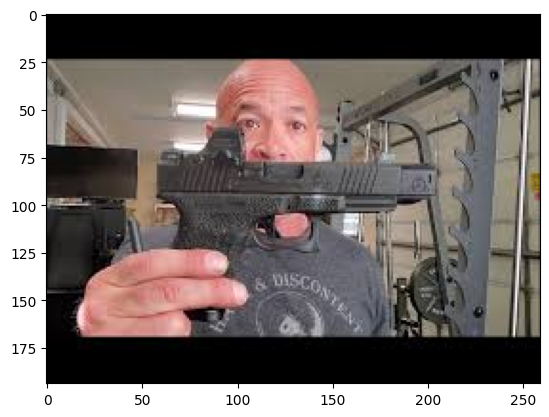

In [28]:
import cv2
import matplotlib.pyplot as plt
sample = cv2.imread('./gun.jpg')  # img read
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

plt.imshow(sample)

In [29]:
# 이미지 넓이 높이 확인
height, width, channels = sample.shape

In [30]:
height, width

(194, 259)

In [31]:
# 이미지 중심
c_x = int(df[1] * width)
c_y = int(df[2] * height)

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead


In [32]:
c_x, c_y  # 검출된 객체 중점

(129, 117)

In [33]:
# 검출 영역의 넓이와 높이
w = int(df[3] * width)
h = int(df[4] * height)
w, h

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead


(146, 100)

In [34]:
x = int(c_x - (w/2))  # w/2만큼 왼쪽으로 이동
y = int(c_y - (h/2))
x, y

(56, 67)

In [35]:
x, y, w, h

(56, 67, 146, 100)

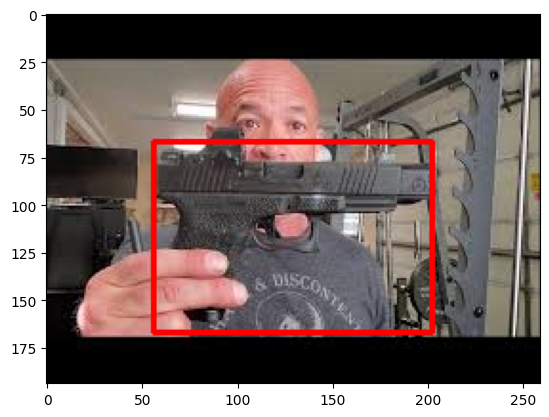

In [36]:
pt1 = (int(x), int(y))  # 검출된 객체의 왼쪽 상단 지점
pt2 = (int(x+w), int(y+h))
cv2.rectangle(sample, pt1, pt2, color=(255, 0, 0), thickness=2)
plt.imshow(sample)